In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amankrpandey1/digit-captcha-images")

print("Path to dataset files:", path)

100%|██████████| 5.58M/5.58M [00:00<00:00, 116MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amankrpandey1/digit-captcha-images/versions/1


In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [4]:
image_width, image_height = 190, 80
data_path =path + "/Captchas"
characters = "0123456789"
char_to_index = {char: idx for idx, char in enumerate(characters)}

In [5]:
def encode_label(label):
    return [char_to_index[char] for char in label]

In [6]:
def preprocess_image(image_path):
    """Load and preprocess an image."""
    img = Image.open(image_path).convert('L')
    img = img.resize((image_width, image_height))
    img_array = np.array(img) / 255.0
    return img_array

In [7]:
images = []
labels = []

In [8]:
for filename in os.listdir(data_path):
    if filename.endswith(".png"):
        img_path = os.path.join(data_path, filename)
        images.append(preprocess_image(img_path))
        label = os.path.splitext(filename)[0]
        labels.append(encode_label(label))

In [9]:
images = np.array(images).reshape(-1, image_height, image_width, 1)

max_length = 6
labels = pad_sequences(labels, maxlen=max_length, padding='post')
labels = np.array(labels)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [11]:
num_classes = 10
captcha_length = 6
image_height, image_width, image_channels = 80, 190, 1

In [12]:
def build_model():
    inputs = Input(shape=(image_height, image_width, image_channels))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = [Dense(num_classes, activation='softmax', name=f'char_{i}')(x) for i in range(captcha_length)]

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy', 'accuracy', 'accuracy', 'accuracy','accuracy','accuracy']
    )

    return model

In [13]:
model = build_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 80, 190, 1)     │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 80, 190, 32)    │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 40, 95, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 40, 95, 32)     │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 40, 95, 64)     │         18,496 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 20, 47, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 20, 47, 64)     │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 20, 47, 128)    │         73,856 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 10, 23, 128)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 10, 23, 128)    │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 29440)          │              0 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │     15,073,792 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 512)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_0 (Dense)            │ (None, 10)             │          5,130 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_1 (Dense)            │ (None, 10)             │          5,130 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_2 (Dense)            │ (None, 10)             │          5,130 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_3 (Dense)            │ (None, 10)             │          5,130 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ char_4 (Dense)            │ (None, 10)             │          5,130 │ dropout_3[0][0]        │
├──────────────────────

 Total params: 15,197,244 (57.97 MB)

 Trainable params: 15,197,244 (57.97 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
y_train_split = [y_train[:, i] for i in range(captcha_length)]
y_test_split = [y_test[:, i] for i in range(captcha_length)]

In [15]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [16]:
history = model.fit(
    X_train,
    y_train_split,
    validation_data=(X_test, y_test_split),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - char_0_accuracy: 0.8548 - char_0_loss: 0.7460 - char_1_accuracy: 0.4512 - char_1_loss: 1.3945 - char_2_accuracy: 0.1107 - char_2_loss: 2.5123 - char_3_accuracy: 0.1103 - char_3_loss: 2.5082 - char_4_accuracy: 0.1156 - char_4_loss: 2.5444 - char_5_accuracy: 0.1196 - char_5_loss: 2.5531 - loss: 12.2587 - val_char_0_accuracy: 0.9465 - val_char_0_loss: 1.1614 - val_char_1_accuracy: 0.4028 - val_char_1_loss: 1.5895 - val_char_2_accuracy: 0.1211 - val_char_2_loss: 2.2989 - val_char_3_accuracy: 0.0845 - val_char_3_loss: 2.3076 - val_char_4_accuracy: 0.0901 - val_char_4_loss: 2.3103 - val_char_5_accuracy: 0.0901 - val_char_5_loss: 2.3031 - val_loss: 11.9804
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - char_0_accuracy: 0.9470 - char_0_loss: 0.3057 - char_1_accuracy: 0.4810 - char_1_loss: 1.0137 - char_2_accuracy: 0.1088 - char_2_loss: 2.3272 - char_3_accuracy: 0.0885 - char_3_loss: 2.3467 - char_4_accuracy: 0.1172 - char_4_loss: 2.3333 

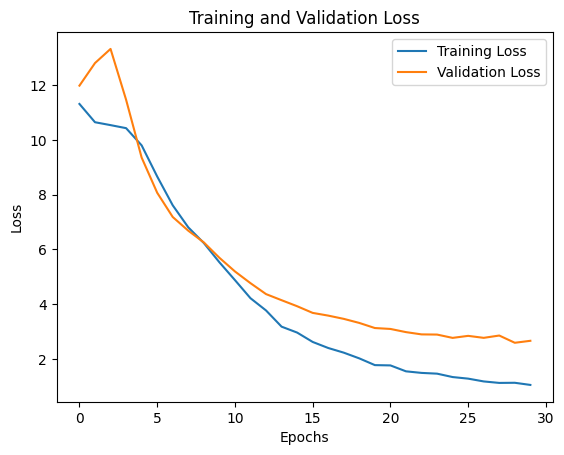

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [18]:
model.save('captcha_solver_cnn.keras')

In [19]:
def predict_captcha(image):
    prediction = model.predict(image.reshape(1, image_height, image_width, image_channels))
    captcha = ''.join([str(np.argmax(p)) for p in prediction])
    return captcha

In [20]:
num_samples = 5

In [21]:
samples = X_test[:num_samples]
true_labels = y_test[:num_samples]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


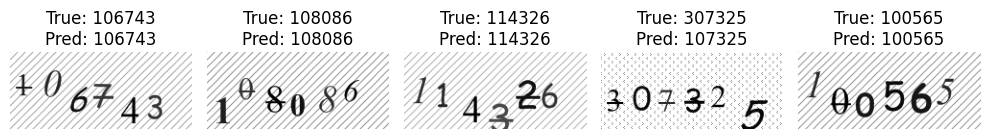

In [22]:
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    image = samples[i]
    true_label = ''.join(map(str, true_labels[i]))
    predicted_label = predict_captcha(image)
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
plt.tight_layout()
plt.show()